In [1]:
### Common imports
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import math

### Custom functions
from src.rbm import RBM
from src.dbn import DBN
from src.data import get_binaryalphadigts

In [2]:
keys_to_idx, idx_to_keys, key_to_set = get_binaryalphadigts()
raw_shape = (20, 16)
X_ordered = np.concatenate(list(key_to_set.values()))
labels = [np.ones(key_to_set[keys_to_idx[key]].shape[0], dtype=int)*key for key in range(36)]
y_ordered = np.concatenate(labels)
y_one_hot = np.zeros((y_ordered.size, y_ordered.max()+1))
y_one_hot[np.arange(y_ordered.size), y_ordered] = 1
X_train, X_test, y_train, y_test = train_test_split(
                                        X_ordered,
                                        y_one_hot,
                                        test_size=0.25,
                                        shuffle=True,)

### Restricted Boltzman Machine

In [ ]:
cfg_rbm = {
    "in_channels":320, 
    "out_channels":64,
}

cfg_train = {
    "n_epoches":1000,
    "lr":0.1,
    "batch_size":64,
    "shuffle":True
}

In [6]:
rbm = RBM(**cfg_rbm)
losses=[]
losses.extend(rbm.train_RBM(X_train, **cfg_train))

  0%|          | 0/1000 [00:00<?, ?it/s]

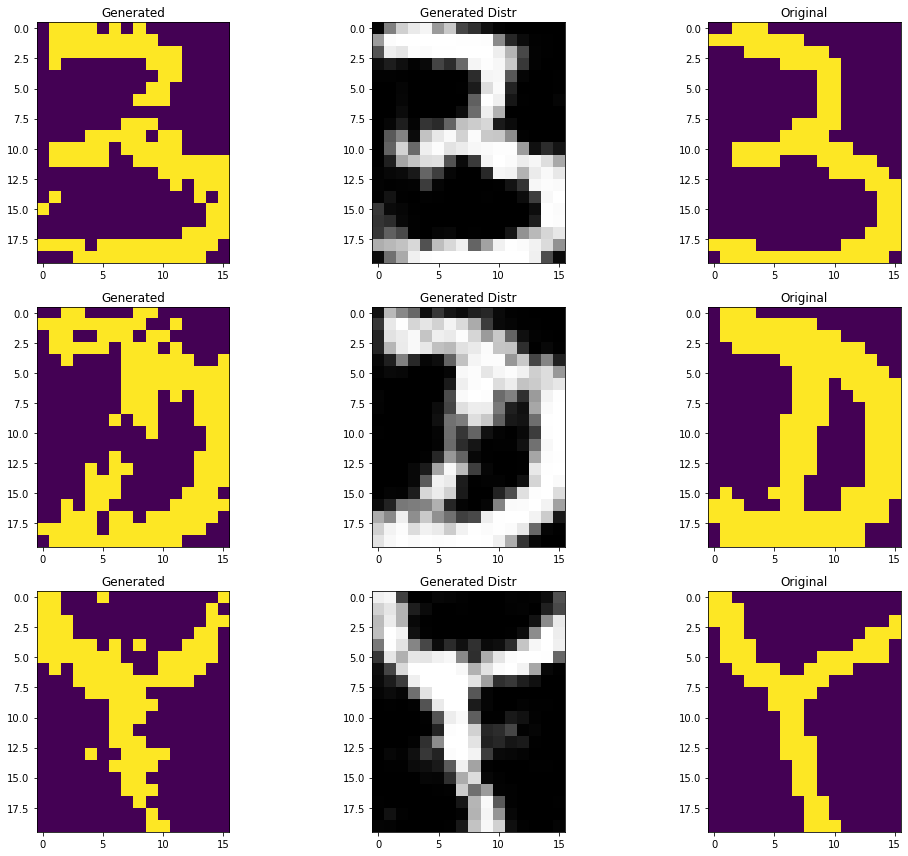

In [23]:
g = rbm.sample(X_test).reshape(-1, *raw_shape)
p_h = rbm.forward(X_test)
sample_h = np.random.uniform(0, 1, p_h.shape)
h = (sample_h < p_h).astype(int)
p_g = rbm.backward(h).reshape(-1, *raw_shape)

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 12))
for i in range(3):
    idx = np.random.randint(0, len(g)-1)
    axs[i, 0].imshow(g[idx])
    axs[i, 0].set_title("Generated")

    axs[i, 1].imshow(p_g[idx], "gray")
    axs[i, 1].set_title("Generated Distr")

    axs[i, 2].imshow(X_test[idx].reshape(raw_shape))
    axs[i, 2].set_title("Original")

plt.tight_layout()
plt.show()

### Deep Belief Network

In [9]:
cfg_dbn = {
    "layers":[RBM(320, 64)]
}

cfg_train = {
    "n_epoches":1000,
    "lr":0.1,
    "batch_size":64,
    "shuffle":True
}

In [10]:
dbn = DBN(**cfg_dbn)